In [1]:
import os
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path = os.path.dirname(os.path.dirname(os.getcwd()))
root_path

'/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution'

In [3]:
dataset_dir = f'{root_path}/data/EyeDentify'
source_path = f'{dataset_dir}/raw'
destination_path = f'{dataset_dir}/Wo_SR/original'

In [4]:
selected_participant = 6
participant_dir_path = f'{source_path}/{selected_participant}'
participant_timestamp_csv = f'{participant_dir_path}/timestamp.csv'

In [5]:
subfolders = [f for f in os.listdir(participant_dir_path) if os.path.isdir(os.path.join(participant_dir_path, f))]

for subfolder in subfolders:
    subfolder_path = os.path.join(participant_dir_path, subfolder)
    participant_tobii_pro_gaze_csv = os.path.join(subfolder_path, "tobii_pro_gaze.csv")
    if os.path.isfile(participant_tobii_pro_gaze_csv):
        break

participant_tobii_pro_gaze_csv

'/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/raw/6/2024-04-22_10-55-10.826064/tobii_pro_gaze.csv'

In [6]:
df1 = pd.read_csv(participant_timestamp_csv)

In [7]:
df2 = pd.read_csv(participant_tobii_pro_gaze_csv)

In [8]:
df1['start'] = df1['start'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))

df1['end'] = df1['end'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [9]:
df1.head()

,session_id,start,end
0,1,2024-04-22 10:55:17,2024-04-22 10:55:20
1,2,2024-04-22 10:55:22,2024-04-22 10:55:25
2,3,2024-04-22 10:55:26,2024-04-22 10:55:29
3,4,2024-04-22 10:55:30,2024-04-22 10:55:33
4,5,2024-04-22 10:55:34,2024-04-22 10:55:37


In [10]:
df2['#timestamp'] = df2['#timestamp'].apply(
    lambda d: (datetime.datetime.fromtimestamp(int(d)/1000) + datetime.timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
)

In [11]:
df2[['#timestamp','pupil_diameter']].head()

,#timestamp,pupil_diameter
0,2024-04-22 10:53:02,NaN
1,2024-04-22 10:53:02,NaN
2,2024-04-22 10:53:02,NaN
3,2024-04-22 10:53:02,NaN
4,2024-04-22 10:53:02,NaN


In [12]:
# Initialize an empty list to store rows that meet the condition
rows_to_include = []

# Get data within the session time ranges
for _, row in df1.iterrows():
        condition = (df2['#timestamp'] >= row['start']) & (df2['#timestamp'] < row['end'])
        matching_rows = df2[condition].copy()  # Use copy to avoid SettingWithCopyWarning
        matching_rows['session_id'] = row['session_id']
        rows_to_include.append(matching_rows)

In [13]:
# Concatenate all matching rows into a new dataframe
new_df = pd.concat(rows_to_include).reset_index(drop=True)

In [14]:
new_df.columns

Index(['#timestamp', 'tobii_system_timestamp', 'toii_device_timestamp',
       'gaze_x', 'gaze_y', 'pupil_diameter', 'left_gaze_origin_validity',
       'left_gaze_origin_in_user_coordinate_system',
       'left_gaze_origin_in_user_coordinate_system.1',
       'left_gaze_origin_in_user_coordinate_system.2',
       'left_gaze_point_in_user_coordinate_system',
       'left_gaze_point_in_user_coordinate_system.1',
       'left_gaze_origin_in_trackbox_coordinate_system',
       'left_gaze_origin_in_trackbox_coordinate_system.1', 'left_gaze_x',
       'left_gaze_y', 'left_pupil_validity', 'left_pupil',
       'right_gaze_origin_validity',
       'right_gaze_origin_in_user_coordinate_system',
       'right_gaze_origin_in_user_coordinate_system.1',
       'right_gaze_origin_in_user_coordinate_system.2',
       'right_gaze_point_in_user_coordinate_system',
       'right_gaze_point_in_user_coordinate_system.1',
       'right_gaze_origin_in_trackbox_coordinate_system',
       'right_gaze_origin_

In [15]:
new_df[["left_gaze_origin_in_user_coordinate_system","left_gaze_origin_in_user_coordinate_system.1", "left_gaze_origin_in_user_coordinate_system.2", "left_pupil"]][:20]

,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_user_coordinate_system.1,left_gaze_origin_in_user_coordinate_system.2,left_pupil
0,-58.424297,101.898544,665.041016,2.253860
1,-58.340237,101.896805,665.188782,2.252930
2,-58.240231,101.909142,665.307068,2.247925
3,-58.206264,101.913727,665.338074,2.249039
4,-58.111744,101.924408,665.381470,2.253418
5,-58.011265,101.941315,665.478882,2.258163
6,-57.978176,101.941002,665.480591,2.244583
7,-57.896698,101.929092,665.464966,2.231277
8,-57.800842,101.900299,665.458984,2.223907
9,-57.773991,101.894028,665.470947,2.223953


In [16]:
new_df[["right_gaze_origin_in_user_coordinate_system","right_gaze_origin_in_user_coordinate_system.1", "right_gaze_origin_in_user_coordinate_system.2", "right_pupil"]].head()

,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_user_coordinate_system.1,right_gaze_origin_in_user_coordinate_system.2,right_pupil
0,7.994732,99.492470,667.247864,2.402374
1,8.102182,99.469940,667.387756,2.396164
2,8.200052,99.446739,667.481079,2.389648
3,8.251994,99.444283,667.516846,2.390640
4,8.360387,99.420059,667.550476,2.386047


In [17]:
new_df[['#timestamp','session_id','pupil_diameter']].head()

,#timestamp,session_id,pupil_diameter
0,2024-04-22 10:55:17,1,2.328117
1,2024-04-22 10:55:17,1,2.324547
2,2024-04-22 10:55:17,1,2.318787
3,2024-04-22 10:55:17,1,2.319839
4,2024-04-22 10:55:17,1,2.319733


In [18]:
new_df[['#timestamp','session_id','pupil_diameter']][:273]

,#timestamp,session_id,pupil_diameter
0,2024-04-22 10:55:17,1,2.328117
1,2024-04-22 10:55:17,1,2.324547
2,2024-04-22 10:55:17,1,2.318787
3,2024-04-22 10:55:17,1,2.319839
4,2024-04-22 10:55:17,1,2.319733
...,...,...,...
268,2024-04-22 10:55:19,1,2.297142
269,2024-04-22 10:55:19,1,2.297607
270,2024-04-22 10:55:19,1,2.294136
271,2024-04-22 10:55:19,1,2.294998


In [19]:
unique_sessions = new_df['session_id'].unique()
print("unique_sessions:", unique_sessions)

unique_sessions: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [20]:
session_data = new_df[new_df['session_id'] == 1].reset_index(drop=True)
unique_timestamps = session_data['#timestamp'].unique()
unique_timestamps

array(['2024-04-22 10:55:17', '2024-04-22 10:55:18',
       '2024-04-22 10:55:19'], dtype=object)

In [21]:
len(session_data)

275

In [22]:
# Function to find NaN values in DataFrame
def find_nan_info(data):
    nan_info = data.isnull()        # Boolean DataFrame showing NaN positions
    nan_columns = nan_info.any()    # Shows which columns have any NaNs
    nan_counts = nan_info.sum()     # Counts NaNs in each column
    return nan_info, nan_columns, nan_counts

In [23]:
# Columns to average
columns_to_average = [
    'right_pupil', 'left_pupil', 'pupil_diameter', 
    'gaze_x', 'gaze_y', 
    'left_gaze_x', 'left_gaze_y', 
    'right_gaze_x', 'right_gaze_y',
    "left_gaze_origin_in_user_coordinate_system","left_gaze_origin_in_user_coordinate_system.1", "left_gaze_origin_in_user_coordinate_system.2",
    "right_gaze_origin_in_user_coordinate_system","right_gaze_origin_in_user_coordinate_system.1", "right_gaze_origin_in_user_coordinate_system.2", 
]

In [24]:
data_1 = session_data[session_data['#timestamp'] == unique_timestamps[0]][columns_to_average].reset_index(drop=True)

In [25]:
data_1.head()

,right_pupil,left_pupil,pupil_diameter,gaze_x,gaze_y,left_gaze_x,left_gaze_y,right_gaze_x,right_gaze_y,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_user_coordinate_system.1,left_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_user_coordinate_system.1,right_gaze_origin_in_user_coordinate_system.2
0,2.402374,2.253860,2.328117,1091.907911,718.682796,0.478113,0.491696,0.492472,0.466548,-58.424297,101.898544,665.041016,7.994732,99.492470,667.247864
1,2.396164,2.252930,2.324547,1089.755505,722.385943,0.477227,0.493708,0.491444,0.469473,-58.340237,101.896805,665.188782,8.102182,99.469940,667.387756
2,2.389648,2.247925,2.318787,1091.673553,721.833989,0.477684,0.495580,0.492692,0.466865,-58.240231,101.909142,665.307068,8.200052,99.446739,667.481079
3,2.390640,2.249039,2.319839,1090.681773,724.362597,0.476956,0.495060,0.492539,0.470757,-58.206264,101.913727,665.338074,8.251994,99.444283,667.516846
4,2.386047,2.253418,2.319733,1089.113887,721.560113,0.477842,0.494616,0.490259,0.467464,-58.111744,101.924408,665.381470,8.360387,99.420059,667.550476


In [26]:
find_nan_info(data_1)

(    right_pupil  left_pupil  pupil_diameter  gaze_x  gaze_y  left_gaze_x  \
 0         False       False           False   False   False        False   
 1         False       False           False   False   False        False   
 2         False       False           False   False   False        False   
 3         False       False           False   False   False        False   
 4         False       False           False   False   False        False   
 ..          ...         ...             ...     ...     ...          ...   
 89        False       False           False   False   False        False   
 90        False       False           False   False   False        False   
 91        False       False           False   False   False        False   
 92        False       False           False   False   False        False   
 93        False       False           False   False   False        False   
 
     left_gaze_y  right_gaze_x  right_gaze_y  \
 0         False         F

In [27]:
data_2 = session_data[session_data['#timestamp'] == unique_timestamps[1]][columns_to_average].reset_index(drop=True)

In [28]:
data_2.head()

,right_pupil,left_pupil,pupil_diameter,gaze_x,gaze_y,left_gaze_x,left_gaze_y,right_gaze_x,right_gaze_y,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_user_coordinate_system.1,left_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_user_coordinate_system.1,right_gaze_origin_in_user_coordinate_system.2
0,2.388138,2.233566,2.310852,1112.546369,722.838253,0.487825,0.497690,0.501105,0.466094,-55.063919,104.688377,667.111755,11.704538,101.760414,668.835999
1,2.378220,2.229599,2.303909,1110.927120,724.695526,0.485929,0.498327,0.501562,0.467934,-54.860146,104.885109,667.205933,11.914521,101.937042,668.912415
2,2.380630,2.224701,2.302666,1109.090779,721.491560,0.485728,0.496191,0.500131,0.465797,-54.788231,104.961479,667.256409,12.017673,102.015022,668.968079
3,2.380112,2.226242,2.303177,1104.184315,724.399500,0.485111,0.493864,0.496386,0.472002,-54.564568,105.213333,667.394653,12.310276,102.267120,669.101562
4,2.384750,2.234375,2.309563,1110.192295,720.392078,0.487509,0.491605,0.499329,0.468918,-54.295975,105.538559,667.657959,12.582358,102.506676,669.316772


In [29]:
data_2.iloc[74]

right_pupil                                         2.434357
left_pupil                                          2.299240
pupil_diameter                                      2.366798
gaze_x                                           1115.210440
gaze_y                                            727.225922
left_gaze_x                                         0.488559
left_gaze_y                                         0.499331
right_gaze_x                                        0.502739
right_gaze_y                                        0.470303
left_gaze_origin_in_user_coordinate_system        -51.684700
left_gaze_origin_in_user_coordinate_system.1      104.891304
left_gaze_origin_in_user_coordinate_system.2      666.073730
right_gaze_origin_in_user_coordinate_system        14.345846
right_gaze_origin_in_user_coordinate_system.1     101.654526
right_gaze_origin_in_user_coordinate_system.2     667.565491
Name: 74, dtype: float64

In [30]:
find_nan_info(data_2)

(    right_pupil  left_pupil  pupil_diameter  gaze_x  gaze_y  left_gaze_x  \
 0         False       False           False   False   False        False   
 1         False       False           False   False   False        False   
 2         False       False           False   False   False        False   
 3         False       False           False   False   False        False   
 4         False       False           False   False   False        False   
 ..          ...         ...             ...     ...     ...          ...   
 82        False       False           False   False   False        False   
 83        False       False           False   False   False        False   
 84        False       False           False   False   False        False   
 85        False       False           False   False   False        False   
 86        False       False           False   False   False        False   
 
     left_gaze_y  right_gaze_x  right_gaze_y  \
 0         False         F

In [31]:
data_3 = session_data[session_data['#timestamp'] == unique_timestamps[2]][columns_to_average].reset_index(drop=True)

In [32]:
data_3.head()

,right_pupil,left_pupil,pupil_diameter,gaze_x,gaze_y,left_gaze_x,left_gaze_y,right_gaze_x,right_gaze_y,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_user_coordinate_system.1,left_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_user_coordinate_system.1,right_gaze_origin_in_user_coordinate_system.2
0,2.443024,2.304169,2.373596,1121.054806,714.185670,0.490821,0.488275,0.505672,0.463973,-48.108643,104.755211,667.661743,18.468180,100.591133,668.612122
1,2.439880,2.300735,2.370308,1123.535816,714.096107,0.492115,0.488713,0.506584,0.463415,-47.837589,104.477684,667.553406,18.726744,100.303200,668.481995
2,2.430710,2.302597,2.366653,1122.361142,714.434803,0.491766,0.488904,0.505888,0.463676,-47.754616,104.398247,667.523499,18.845510,100.194336,668.425354
3,2.433807,2.304733,2.369270,1119.678732,717.599116,0.488908,0.489433,0.506362,0.467365,-47.537350,104.241142,667.448059,19.074697,100.032410,668.311218
4,2.433899,2.304382,2.369141,1117.997758,716.636628,0.488215,0.489291,0.505561,0.466225,-47.303963,104.111908,667.319641,19.287342,99.925278,668.160828


In [33]:
find_nan_info(data_3)

(    right_pupil  left_pupil  pupil_diameter  gaze_x  gaze_y  left_gaze_x  \
 0         False       False           False   False   False        False   
 1         False       False           False   False   False        False   
 2         False       False           False   False   False        False   
 3         False       False           False   False   False        False   
 4         False       False           False   False   False        False   
 ..          ...         ...             ...     ...     ...          ...   
 89        False       False           False   False   False        False   
 90        False       False           False   False   False        False   
 91        False       False           False   False   False        False   
 92        False       False           False   False   False        False   
 93        False       False           False   False   False        False   
 
     left_gaze_y  right_gaze_x  right_gaze_y  \
 0         False         F

In [34]:
print(len(data_1),len(data_2),len(data_3))

94 87 94


In [35]:
# Create a dictionary to store the row-wise mean for each specified column
rowwise_means = {}

# Loop through each column and compute the row-wise mean
for column in columns_to_average:
    # Concatenate the specific column from each DataFrame
    concatenated_column = pd.concat([data_1[column], data_2[column], data_3[column]], axis=1)
    
    # Calculate row-wise mean, ignoring NaN values
    rowwise_means[column] = concatenated_column.mean(axis=1)

# Create a new DataFrame from the calculated row-wise means
average_selected_data = pd.DataFrame(rowwise_means)

In [36]:
concatenated_column

,right_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system.2
0,667.247864,668.835999,668.612122
1,667.387756,668.912415,668.481995
2,667.481079,668.968079,668.425354
3,667.516846,669.101562,668.311218
4,667.550476,669.316772,668.160828
...,...,...,...
89,668.802490,NaN,671.414612
90,668.762329,NaN,671.401428
91,668.713440,NaN,671.439331
92,668.675842,NaN,671.443420


In [37]:
average_selected_data

,right_pupil,left_pupil,pupil_diameter,gaze_x,gaze_y,left_gaze_x,left_gaze_y,right_gaze_x,right_gaze_y,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_user_coordinate_system.1,left_gaze_origin_in_user_coordinate_system.2,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_user_coordinate_system.1,right_gaze_origin_in_user_coordinate_system.2
0,2.411179,2.263865,2.337522,1108.503029,718.568906,0.485586,0.492554,0.499750,0.465538,-53.865620,103.780711,666.604838,12.722483,100.614672,668.231995
1,2.404755,2.261088,2.332921,1108.072814,720.392525,0.485090,0.493583,0.499863,0.466941,-53.679324,103.753199,666.649374,12.914482,100.570061,668.260722
2,2.400329,2.258408,2.329369,1107.708491,719.253451,0.485059,0.493558,0.499570,0.465446,-53.594359,103.756289,666.695659,13.021078,100.552032,668.291504
3,2.401520,2.260005,2.330762,1104.848273,722.120404,0.483658,0.492786,0.498429,0.470041,-53.436061,103.789401,666.726929,13.212322,100.581271,668.309875
4,2.401565,2.264058,2.332812,1105.767980,719.529606,0.484522,0.491837,0.498383,0.467536,-53.237227,103.858292,666.786357,13.410029,100.617338,668.342692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2.363663,2.230713,2.297188,1111.136718,719.702806,0.486185,0.494792,0.501492,0.464811,-47.121460,103.348759,669.260925,19.392469,99.693195,670.108551
90,2.367462,2.232125,2.299793,1110.772909,721.227229,0.485697,0.495344,0.501656,0.466292,-47.153903,103.342502,669.236969,19.355650,99.683181,670.081879
91,2.373954,2.230118,2.302036,1109.075926,719.086490,0.486243,0.493542,0.499602,0.465240,-47.191834,103.342998,669.232391,19.342975,99.695732,670.076386
92,2.383636,2.238777,2.311207,1107.656669,718.910694,0.485604,0.493262,0.498980,0.465285,-47.174022,103.357166,669.213928,19.364230,99.722462,670.059631


In [38]:
# Dictionary to store results
results = {}

# Loop through each session and calculate averages
for session_id in unique_sessions:

    session_data = new_df[new_df['session_id'] == session_id].reset_index(drop=True)
    unique_timestamps = session_data['#timestamp'].unique()

    # Get data for each timestamp
    data_1 = session_data[session_data['#timestamp'] == unique_timestamps[0]][columns_to_average].reset_index(drop=True)
    data_2 = session_data[session_data['#timestamp'] == unique_timestamps[1]][columns_to_average].reset_index(drop=True)
    data_3 = session_data[session_data['#timestamp'] == unique_timestamps[2]][columns_to_average].reset_index(drop=True)

    # Create a dictionary to store the row-wise mean for each specified column
    rowwise_means = {}

    # Loop through each column and compute the row-wise mean
    for column in columns_to_average:
        # Concatenate the specific column from each DataFrame
        concatenated_column = pd.concat([data_1[column], data_2[column], data_3[column]], axis=1)
        
        # Calculate row-wise mean
        rowwise_means[column] = concatenated_column.mean(axis=1)

    # Create a new DataFrame from the calculated row-wise means
    average_selected_data = pd.DataFrame(rowwise_means)

    # Create a DataFrame with the common timestamp
    common_timestamp = session_data[session_data['#timestamp'] == unique_timestamps[0]]['#timestamp'].iloc[0]

    final_selected_data = pd.DataFrame({
        '#timestamp': [common_timestamp] * len(average_selected_data),
        'session_id': [session_id] * len(average_selected_data),
        **average_selected_data.to_dict(orient='list')
    })

    # Rename columns in the final_selected_data DataFrame
    final_selected_data = final_selected_data.rename(columns={
        'gaze_x': 'gaze_x_screen_abs_2d_x', 
        'gaze_y': 'gaze_y_screen_abs_2d_y',
        'left_gaze_x': 'left_gaze_screen_rel_2d_x', 
        'left_gaze_y': 'left_gaze_screen_rel_2d_y', 
        'right_gaze_x': 'right_gaze_screen_rel_2d_x', 
        'right_gaze_y': 'right_gaze_screen_rel_2d_x',
        'left_gaze_origin_in_user_coordinate_system': 'left_gaze_3d_x',
        'left_gaze_origin_in_user_coordinate_system.1': 'left_gaze_3d_y',
        'left_gaze_origin_in_user_coordinate_system.2': 'left_gaze_3d_z',
        'right_gaze_origin_in_user_coordinate_system': 'right_gaze_3d_x',
        'right_gaze_origin_in_user_coordinate_system.1': 'right_gaze_3d_y',
        'right_gaze_origin_in_user_coordinate_system.2': 'right_gaze_3d_z'
    })

    results[session_id] = final_selected_data


In [39]:
len(results)

50

In [40]:
selected_session_id = 1

In [41]:
results[selected_session_id].columns

Index(['#timestamp', 'session_id', 'right_pupil', 'left_pupil',
       'pupil_diameter', 'gaze_x_screen_abs_2d_x', 'gaze_y_screen_abs_2d_y',
       'left_gaze_screen_rel_2d_x', 'left_gaze_screen_rel_2d_y',
       'right_gaze_screen_rel_2d_x', 'right_gaze_screen_rel_2d_x',
       'left_gaze_3d_x', 'left_gaze_3d_y', 'left_gaze_3d_z', 'right_gaze_3d_x',
       'right_gaze_3d_y', 'right_gaze_3d_z'],
      dtype='object')

In [42]:
results[selected_session_id]

,#timestamp,session_id,right_pupil,left_pupil,pupil_diameter,gaze_x_screen_abs_2d_x,gaze_y_screen_abs_2d_y,left_gaze_screen_rel_2d_x,left_gaze_screen_rel_2d_y,right_gaze_screen_rel_2d_x,right_gaze_screen_rel_2d_x,left_gaze_3d_x,left_gaze_3d_y,left_gaze_3d_z,right_gaze_3d_x,right_gaze_3d_y,right_gaze_3d_z
0,2024-04-22 10:55:17,1,2.411179,2.263865,2.337522,1108.503029,718.568906,0.485586,0.492554,0.499750,0.465538,-53.865620,103.780711,666.604838,12.722483,100.614672,668.231995
1,2024-04-22 10:55:17,1,2.404755,2.261088,2.332921,1108.072814,720.392525,0.485090,0.493583,0.499863,0.466941,-53.679324,103.753199,666.649374,12.914482,100.570061,668.260722
2,2024-04-22 10:55:17,1,2.400329,2.258408,2.329369,1107.708491,719.253451,0.485059,0.493558,0.499570,0.465446,-53.594359,103.756289,666.695659,13.021078,100.552032,668.291504
3,2024-04-22 10:55:17,1,2.401520,2.260005,2.330762,1104.848273,722.120404,0.483658,0.492786,0.498429,0.470041,-53.436061,103.789401,666.726929,13.212322,100.581271,668.309875
4,2024-04-22 10:55:17,1,2.401565,2.264058,2.332812,1105.767980,719.529606,0.484522,0.491837,0.498383,0.467536,-53.237227,103.858292,666.786357,13.410029,100.617338,668.342692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024-04-22 10:55:17,1,2.363663,2.230713,2.297188,1111.136718,719.702806,0.486185,0.494792,0.501492,0.464811,-47.121460,103.348759,669.260925,19.392469,99.693195,670.108551
90,2024-04-22 10:55:17,1,2.367462,2.232125,2.299793,1110.772909,721.227229,0.485697,0.495344,0.501656,0.466292,-47.153903,103.342502,669.236969,19.355650,99.683181,670.081879
91,2024-04-22 10:55:17,1,2.373954,2.230118,2.302036,1109.075926,719.086490,0.486243,0.493542,0.499602,0.465240,-47.191834,103.342998,669.232391,19.342975,99.695732,670.076386
92,2024-04-22 10:55:17,1,2.383636,2.238777,2.311207,1107.656669,718.910694,0.485604,0.493262,0.498980,0.465285,-47.174022,103.357166,669.213928,19.364230,99.722462,670.059631


In [43]:
find_nan_info(results[selected_session_id])

(    #timestamp  session_id  right_pupil  left_pupil  pupil_diameter  \
 0        False       False        False       False           False   
 1        False       False        False       False           False   
 2        False       False        False       False           False   
 3        False       False        False       False           False   
 4        False       False        False       False           False   
 ..         ...         ...          ...         ...             ...   
 89       False       False        False       False           False   
 90       False       False        False       False           False   
 91       False       False        False       False           False   
 92       False       False        False       False           False   
 93       False       False        False       False           False   
 
     gaze_x_screen_abs_2d_x  gaze_y_screen_abs_2d_y  left_gaze_screen_rel_2d_x  \
 0                    False                   False 

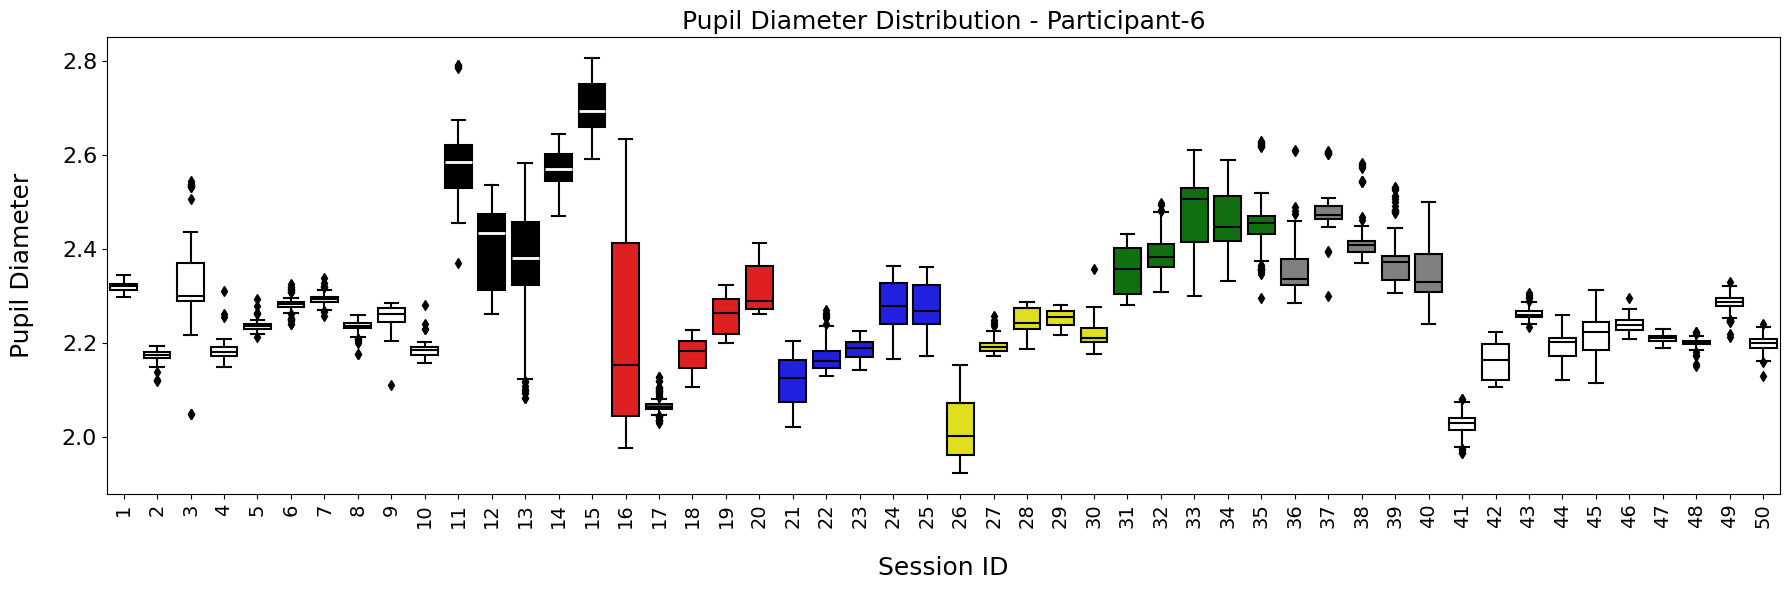

In [44]:
# Box plot for all sessions
import numpy as np

# session_ids = list(results.keys())
# pupil_diameters = [results[session]['pupil_diameter'] for session in session_ids]

# Box plot
# fig, ax = plt.subplots(figsize=(14, 6))
# sns.boxplot(data=pupil_diameters, ax=ax)
# ax.set_xticklabels(session_ids)
# ax.set_xlabel('Session ID')
# ax.set_ylabel('Pupil Diameter')
# ax.set_title(f'Box Plot of Pupil Diameter for Each Session of Participant-{selected_participant}')

session_ids = list(results.keys())
pupil_diameters = [
    {"session_id": session, "pupil_diameter": diameter}
    for session in session_ids
    for diameter in results[session]["pupil_diameter"]
]

# Convert to DataFrame
data = pd.DataFrame(pupil_diameters)
pupil_diameter_list_of_lists = (
    data.groupby("session_id")["pupil_diameter"].apply(list).tolist()
)

# Define colors for each session group
colors = []
for i in range(1, 51):
    if 1 <= i <= 10:
        colors.append("white")
    elif 11 <= i <= 15:
        colors.append("black")
    elif 16 <= i <= 20:
        colors.append("red")
    elif 21 <= i <= 25:
        colors.append("blue")
    elif 26 <= i <= 30:
        colors.append("yellow")
    elif 31 <= i <= 35:
        colors.append("green")
    elif 36 <= i <= 40:
        colors.append("gray")
    elif 41 <= i <= 50:
        colors.append("white")

# Plot the boxplot
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=pupil_diameter_list_of_lists, ax=ax, palette=colors, flierprops={"marker": "d"}, fliersize=5)

ax.set_xticklabels(session_ids, rotation=90,  fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=14)

ax.set_xlabel("Session ID", fontsize=18, labelpad=20)
ax.set_ylabel("Pupil Diameter", fontsize=18, labelpad=20)
ax.set_title(
    f"Pupil Diameter Distribution - Participant-{selected_participant}", fontsize=18
)
for i in range(10, 15):
    median_line = ax.lines[i * 6 + 4]  # Each box plot consists of 6 lines, the median is the 5th line
    median_line.set_color('white')
    median_line.set_linewidth(2)

plt.tight_layout()
# plt.savefig("tst.png")
plt.show()


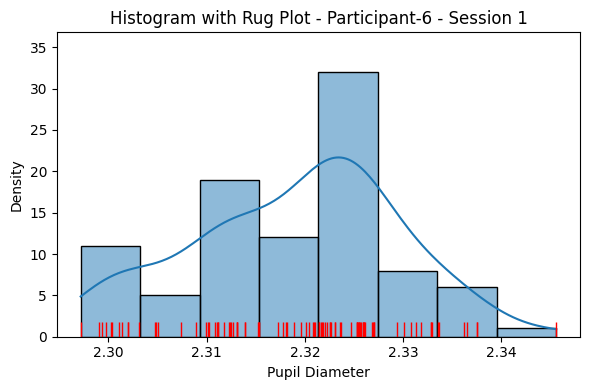

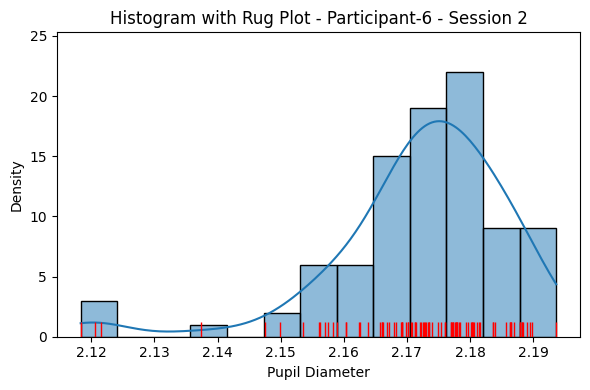

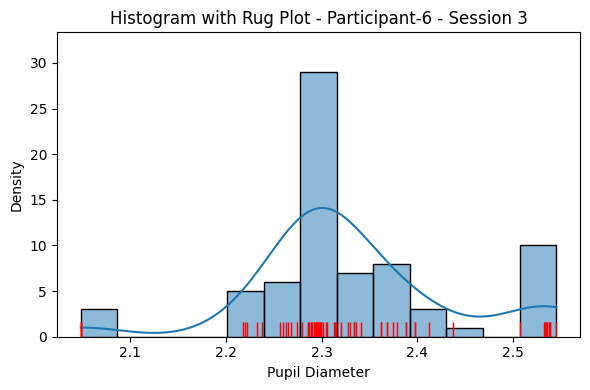

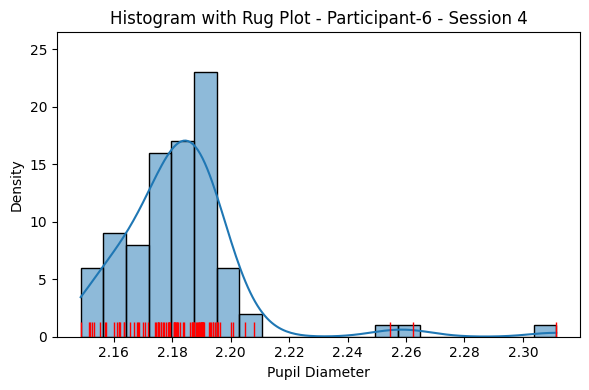

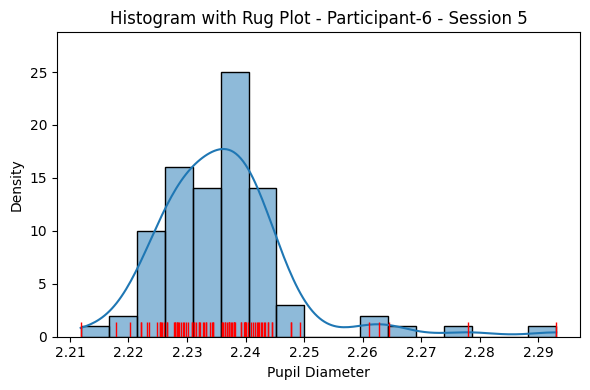

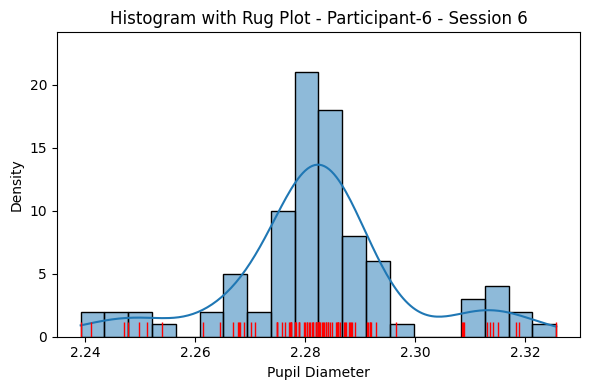

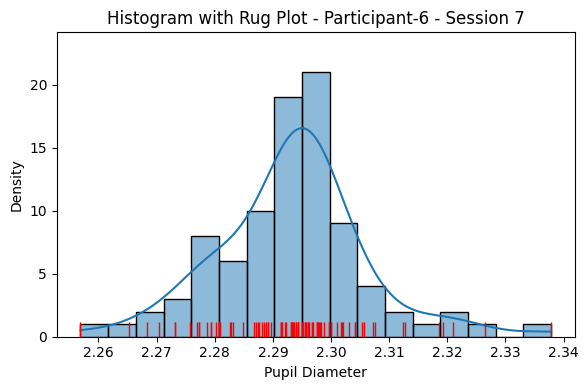

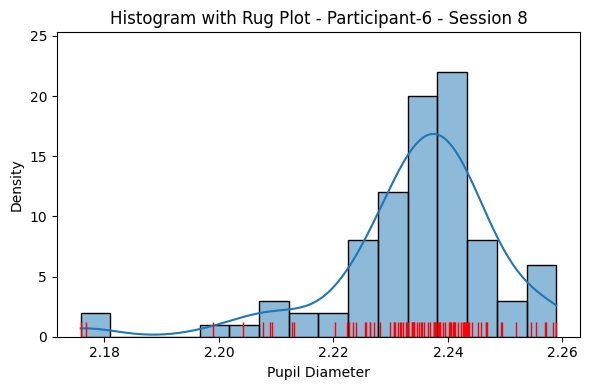

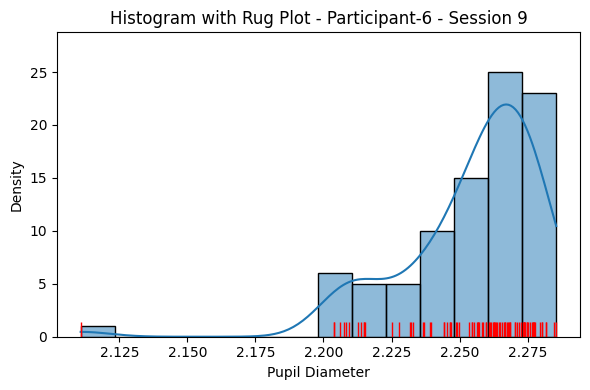

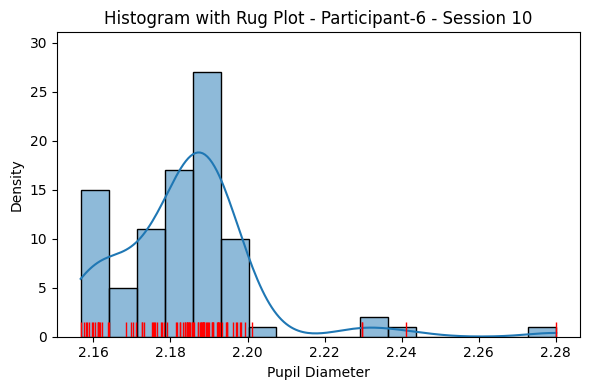

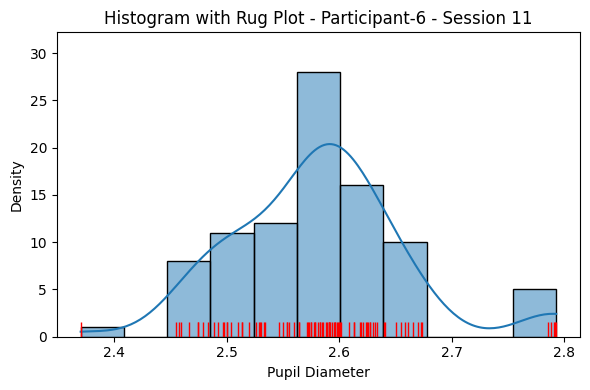

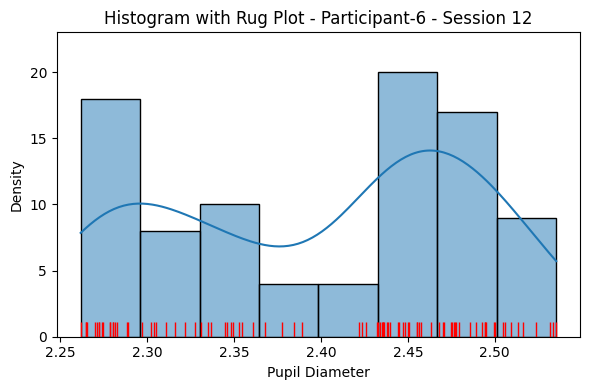

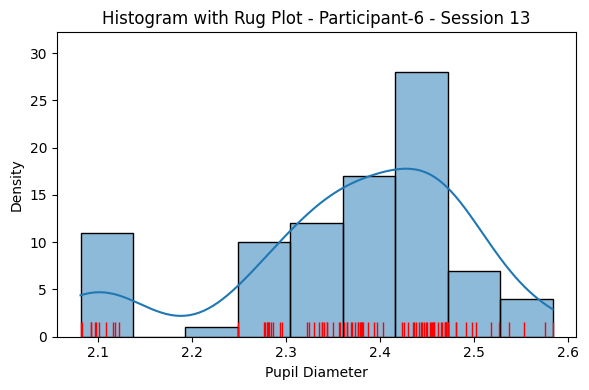

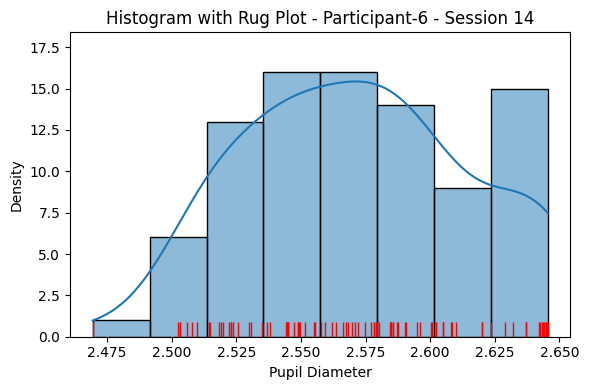

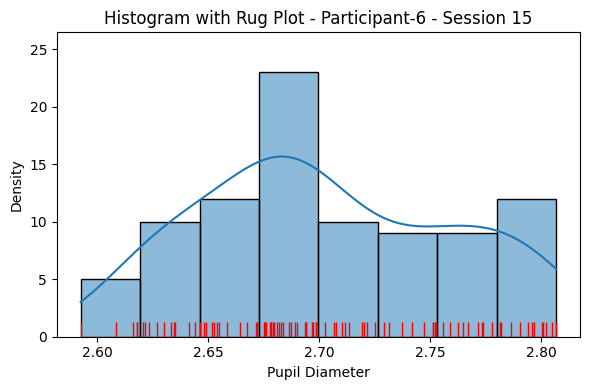

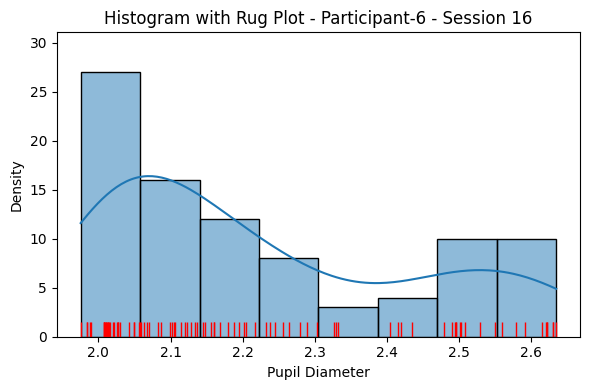

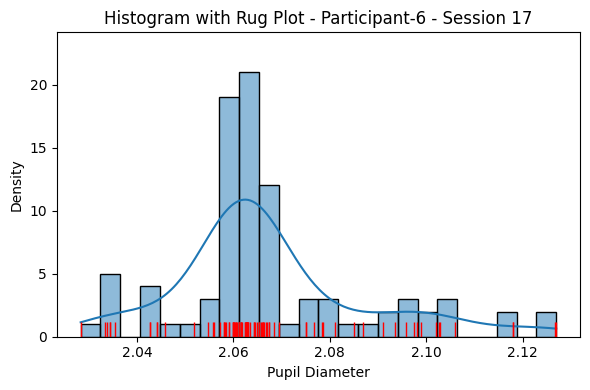

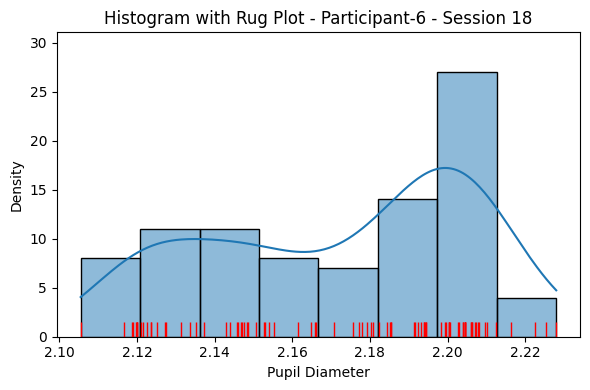

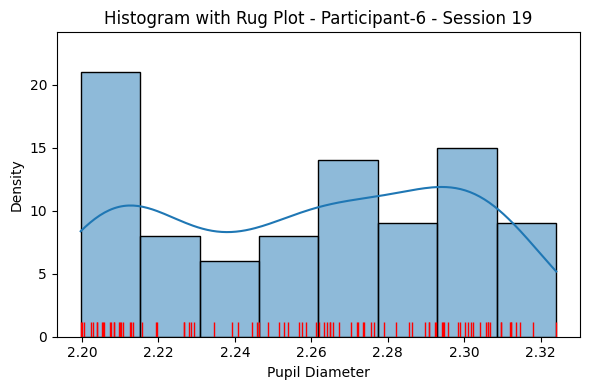

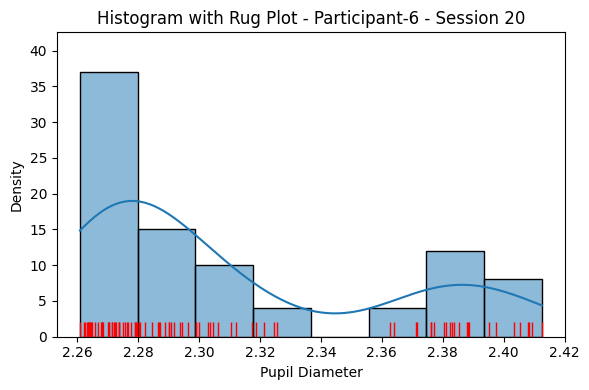

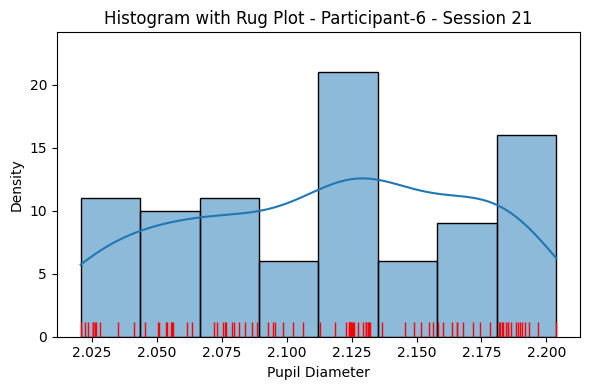

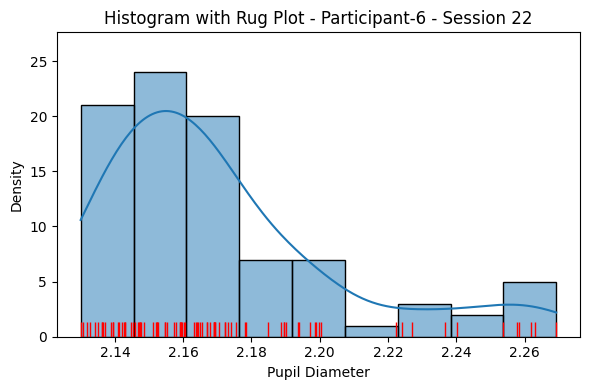

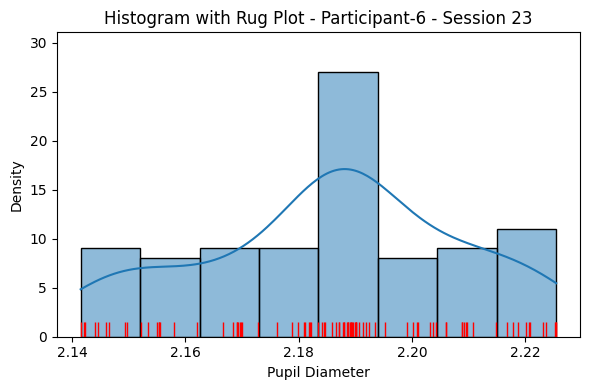

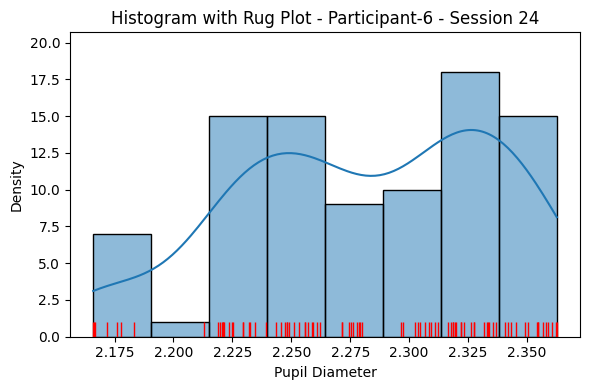

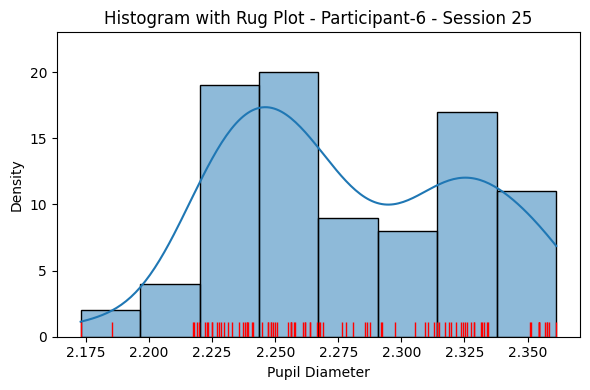

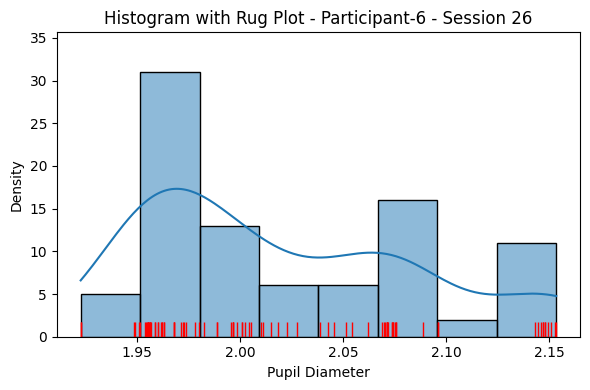

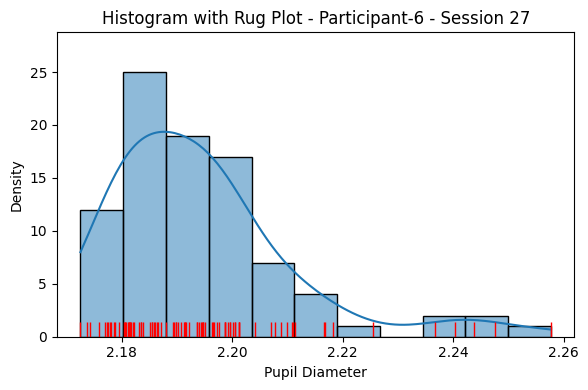

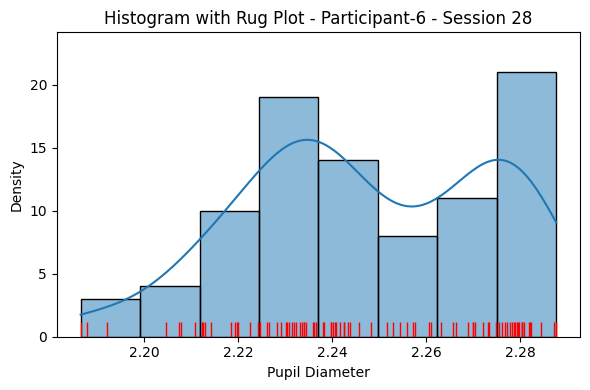

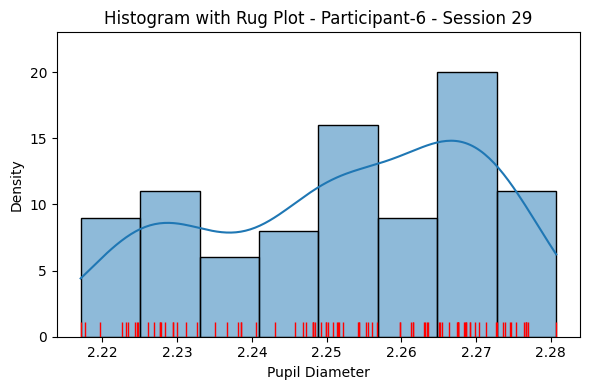

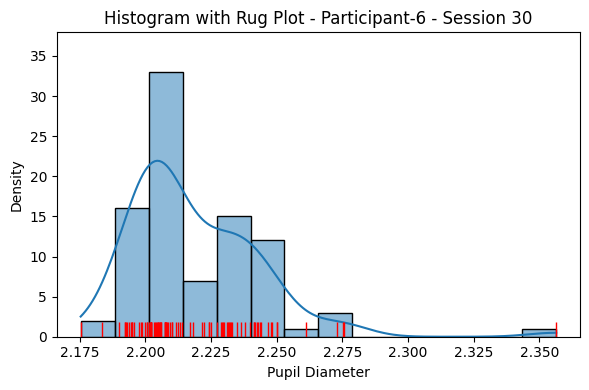

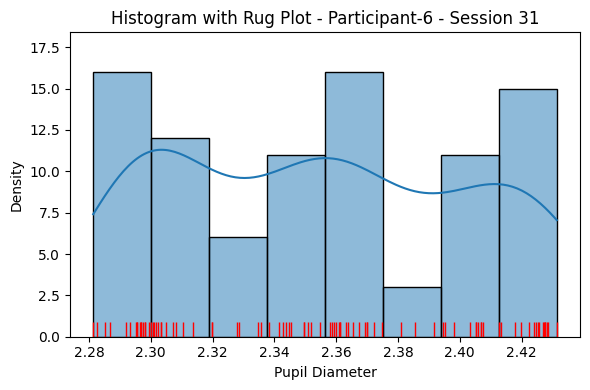

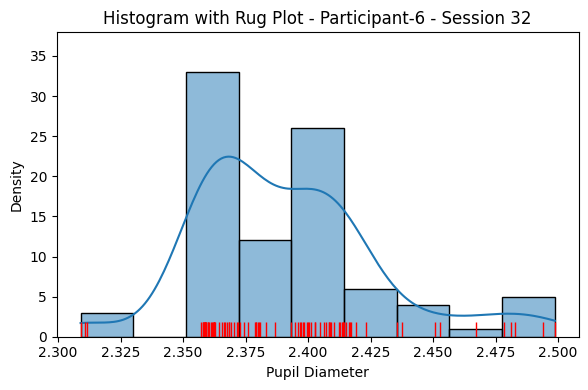

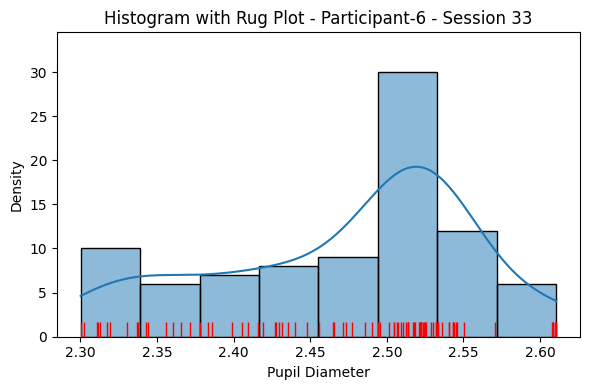

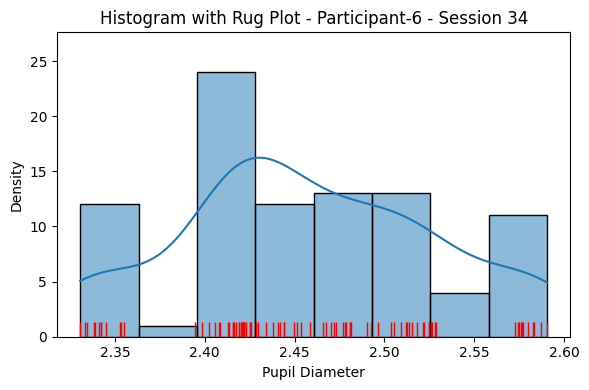

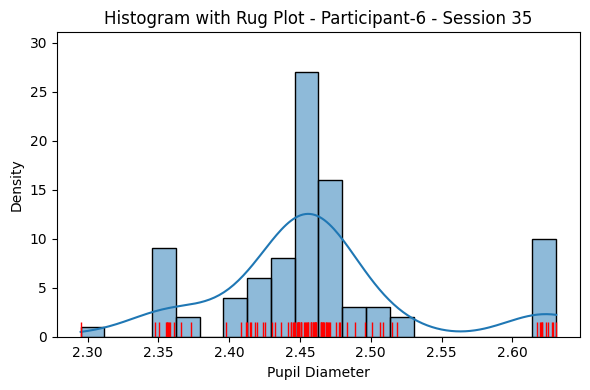

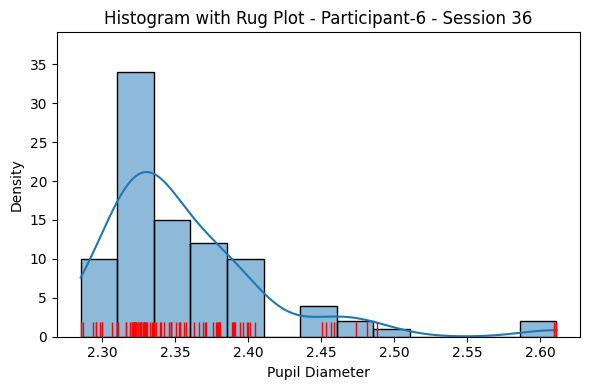

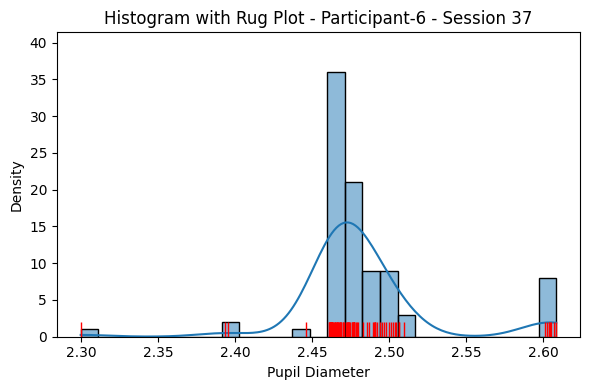

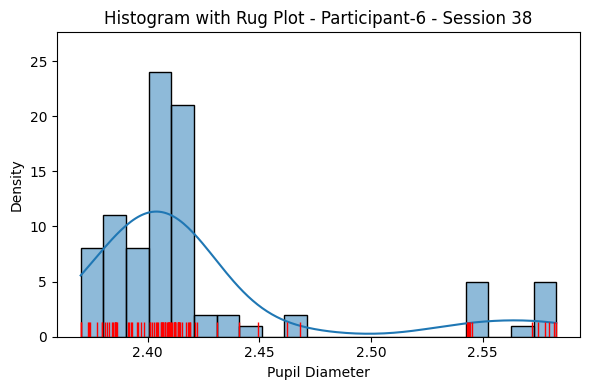

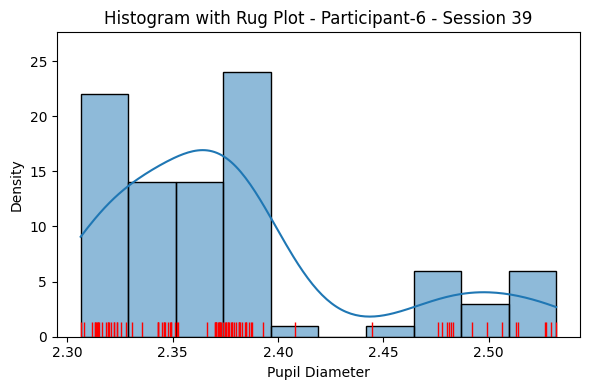

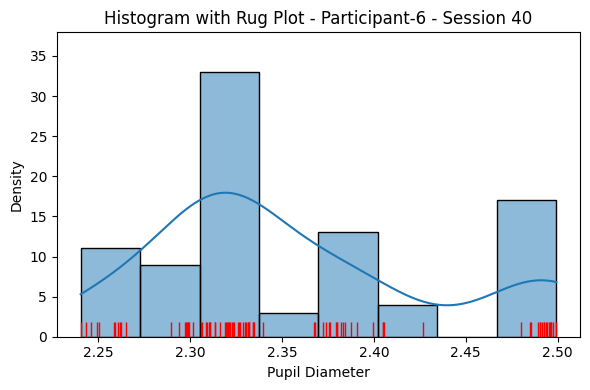

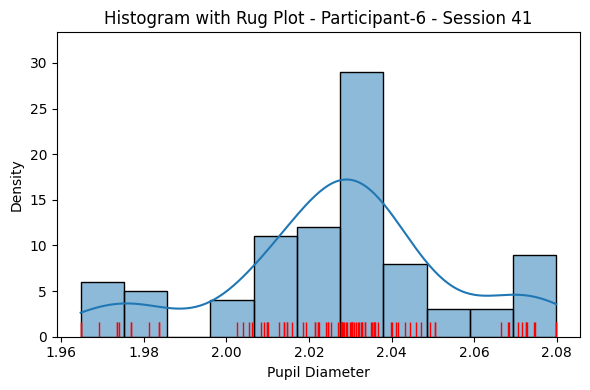

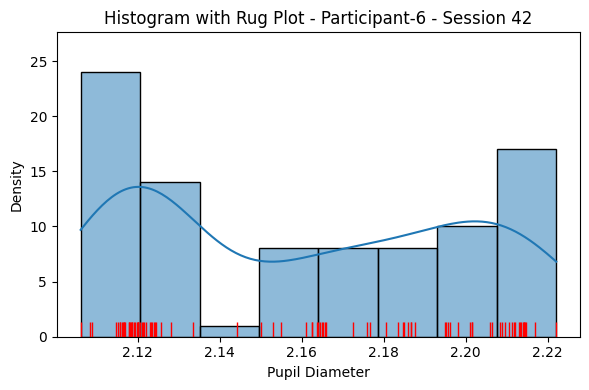

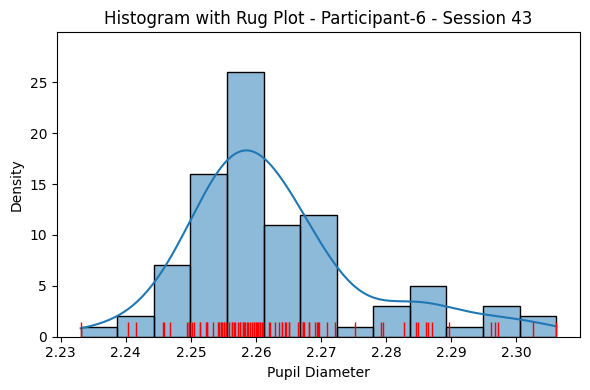

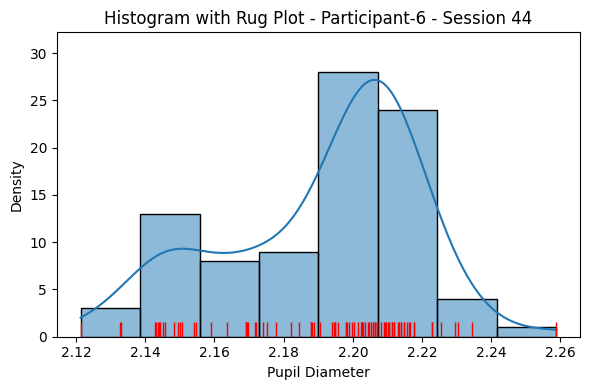

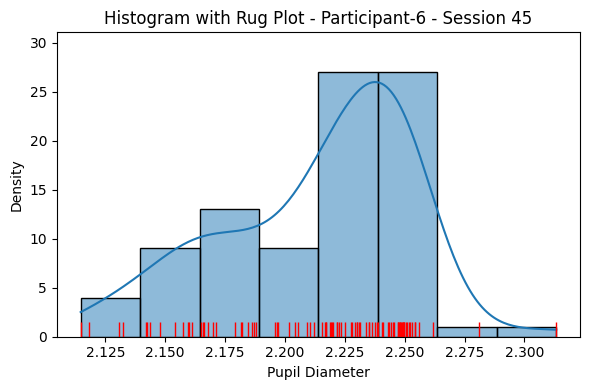

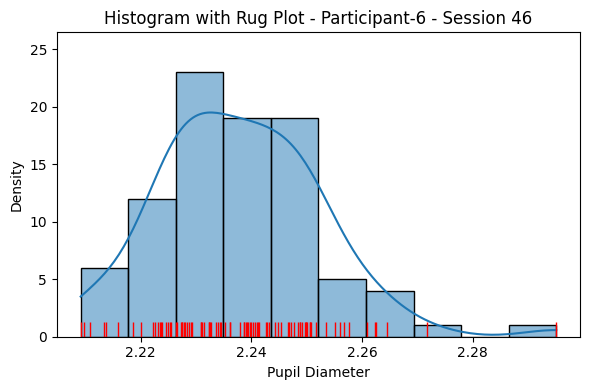

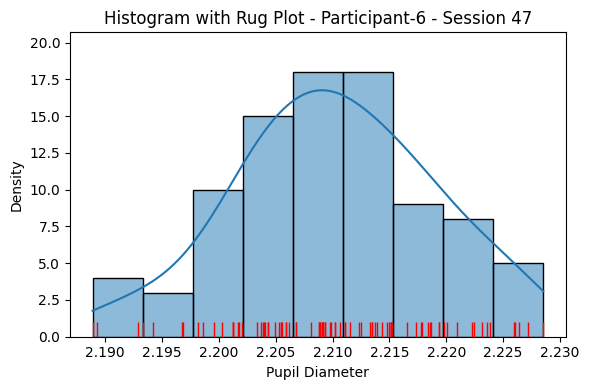

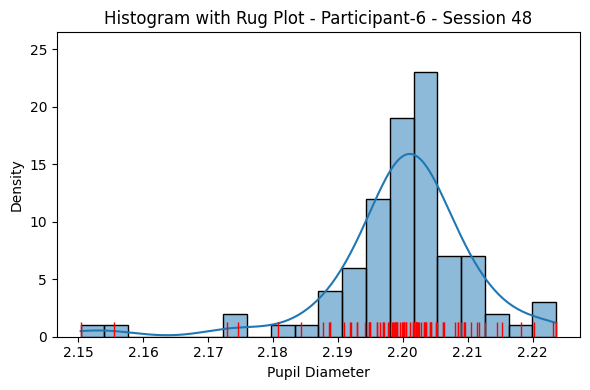

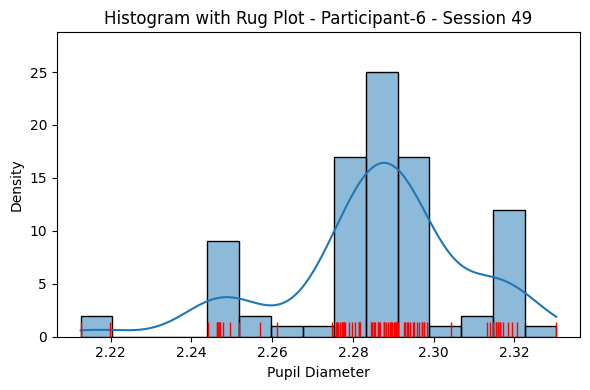

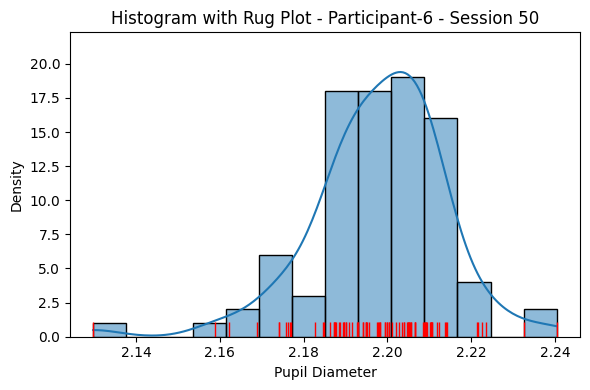

In [45]:
# Loop through the results dictionary and create separate plots for each session
for session_id, data in results.items():
    # Create a new figure for each session
    fig, ax = plt.subplots(figsize=(6, 4))  # Adjust size as needed
    
    # Create histogram with rug plot
    sns.histplot(data['pupil_diameter'], kde=True, ax=ax)  # Histogram with KDE
    sns.rugplot(data['pupil_diameter'], ax=ax, height=0.05, linewidth=1, color='red')  # Rug plot overlay
    
    # Set titles and labels
    ax.set_title(f'Histogram with Rug Plot - Participant-{selected_participant} - Session {session_id}')
    ax.set_xlabel('Pupil Diameter')
    ax.set_ylabel('Density')

    # Adjust layout and display the plot
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()  # Show the plot for this session
